In [1]:
import mfpy
import matplotlib.pyplot as plt
from cycler import cycler
from matplotlib.lines import Line2D

In [2]:
FZ0  = 4000 #FZ nominal
R0 = 0.30 #Unloaded radius in m (necessary parameter)
VX = 20

In [3]:
#Creating initial guess using a tir file
initial_guess = mfpy.preprocessing.read_tir(r'samples/pacejka_tir52.tir')
initial_guess_FX  = initial_guess.LONGITUDINAL_COEFFICIENTS
initial_guess_FX_pure = [initial_guess_FX.PCX1,initial_guess_FX.PDX1,initial_guess_FX.PDX2,
                         initial_guess_FX.PDX3,initial_guess_FX.PEX1,initial_guess_FX.PEX2,
                         initial_guess_FX.PEX3,initial_guess_FX.PEX4,initial_guess_FX.PKX1,
                         initial_guess_FX.PKX2,initial_guess_FX.PKX3,initial_guess_FX.PHX1,
                         initial_guess_FX.PHX2,initial_guess_FX.PVX1,initial_guess_FX.PVX2]
initial_guess_FX_combined  = [initial_guess_FX.RBX1,initial_guess_FX.RBX2,initial_guess_FX.RCX1,
                         initial_guess_FX.REX1,initial_guess_FX.REX2,initial_guess_FX.RHX1]

initial_guess_FY  = initial_guess.LATERAL_COEFFICIENTS
initial_guess_FY_pure = [initial_guess_FY.PCY1,initial_guess_FY.PDY1,initial_guess_FY.PDY2,
                         initial_guess_FY.PDY3,initial_guess_FY.PEY1,initial_guess_FY.PEY2,
                         initial_guess_FY.PEY3,initial_guess_FY.PEY4,initial_guess_FY.PKY1,
                         initial_guess_FY.PKY2,initial_guess_FY.PKY3,
                         initial_guess_FY.PHY1,initial_guess_FY.PHY2,initial_guess_FY.PHY3,
                         initial_guess_FY.PVY1,initial_guess_FY.PVY2,initial_guess_FY.PVY3,
                         initial_guess_FY.PVY4]

initial_guess_FY_combined  = [initial_guess_FY.RBY1,initial_guess_FY.RBY2,initial_guess_FY.RBY3,
                              initial_guess_FY.RCY1,initial_guess_FY.REY1,initial_guess_FY.REY2,
                              initial_guess_FY.RHY1,initial_guess_FY.RHY2,initial_guess_FY.RVY1,
                              initial_guess_FY.RVY2,initial_guess_FY.RVY3,initial_guess_FY.RVY4,
                              initial_guess_FY.RVY5,initial_guess_FY.RVY6]

initial_guess_MZ = initial_guess.ALIGNING_COEFFICIENTS
initial_guess_MZ_pure = [initial_guess_MZ.QBZ1,initial_guess_MZ.QBZ2,initial_guess_MZ.QBZ3,
                         initial_guess_MZ.QBZ4,initial_guess_MZ.QBZ5,initial_guess_MZ.QBZ9,
                         initial_guess_MZ.QBZ10,initial_guess_MZ.QCZ1,initial_guess_MZ.QDZ1,
                         initial_guess_MZ.QDZ2,initial_guess_MZ.QDZ3,initial_guess_MZ.QDZ4,
                         initial_guess_MZ.QDZ6,initial_guess_MZ.QDZ7,initial_guess_MZ.QDZ8,
                         initial_guess_MZ.QDZ9,initial_guess_MZ.QEZ1,initial_guess_MZ.QEZ2,
                         initial_guess_MZ.QEZ3,initial_guess_MZ.QEZ4,initial_guess_MZ.QEZ5,
                         initial_guess_MZ.QHZ1,initial_guess_MZ.QHZ2,initial_guess_MZ.QHZ3,
                         initial_guess_MZ.QHZ4]

initial_guess_MZ_combined = [initial_guess_MZ.SSZ1,initial_guess_MZ.SSZ2,initial_guess_MZ.SSZ3,
                         initial_guess_MZ.SSZ4]



### Fx pure

[ 1.50035450e+00  1.00048570e+00  4.23445683e-04 -4.07589483e-08
 -5.24529488e-01  7.64102464e-03  8.27265215e-02 -2.89357205e-02
  5.62911206e+00  5.61353022e+00 -6.63813743e-01 -4.68932891e-04
  2.32590092e-04  4.41573747e-04  5.15670123e-04]


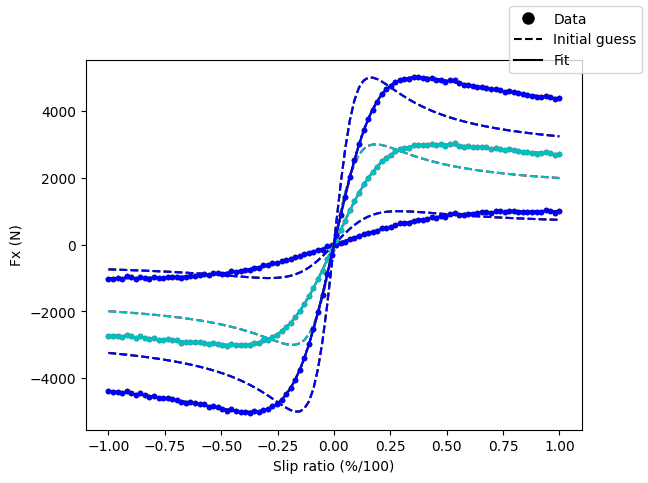

In [4]:
Fx_pure_folder = r'samples\fit\Fx_pure' #Folder that contains the .csv files in the right name format. For more details check the MFPy_/fit.py or read the readme.md



'''Calling the fit function for the Fx_Pure. The user can chose if he wants to inputs his own initial guess for the fitting process, the nominal force and 
the desired output. For initial_guess = None, the function will use a pre-built initial guess. For Fz_nom = None, the function will use the median of the
Fz forces in the .csv file.
For the output types, with full_output is None, the output will be only the fittted coefficients (p_fit) and the Fx_fitted. For a complete output, the user can
can use the full_output = 2.
'''

p_fit_FX0,initial_guess,FZ_nom,FZ_data_output,FX_data_output,kappa_data,gamma_data,FX_initial_output,FX_fit_output =mfpy.fit.FX_pure(Fx_pure_folder,initial_guess =
                                                                                                                                      initial_guess_FX_pure,FZ_nom=FZ0,full_output=2)


#Plot settings
colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)

fig, ax = plt.subplots()
for i in range(len(FZ_data_output)):
    color = colors[i % len(colors)] 
    ax.plot(kappa_data[i],FX_initial_output[i],'--',color=color)
    ax.plot(kappa_data[i],FX_data_output[i],':',marker=".",color=color)
    ax.plot(kappa_data[i],FX_fit_output[i],'-',color=color,label='Fz {} N'.format(FZ_data_output[i]))
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right')
ax.set_xlabel('Slip ratio (%/100)')
ax.set_ylabel('Fx (N)')
print(p_fit_FX0)


### Fy pure cornering

[ 1.62871517e+00  9.98942228e-01 -4.17365498e-03 -2.25584250e-08
 -7.34047255e-01 -4.56746873e-01 -3.98596102e-02  1.22037987e-06
 -3.76427015e+00  1.09888012e+00  4.07135252e-09  5.53802801e-04
  8.95369621e-04 -5.50484859e-09  2.11275872e-03  1.79793375e-03
  1.99999970e-01 -2.29561226e-08]


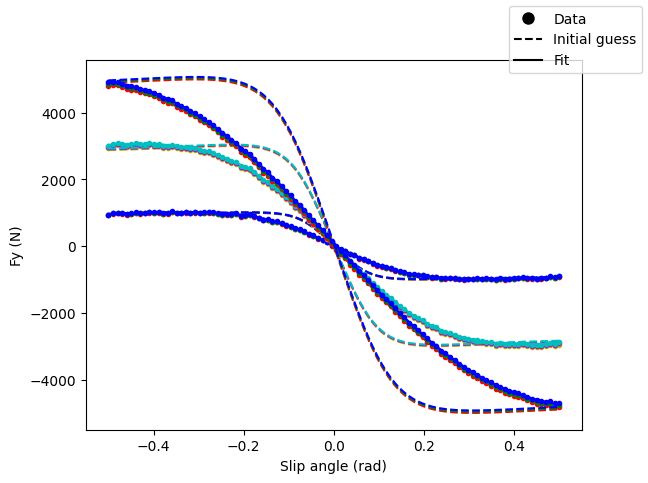

In [5]:
Fy_pure_folder = r'samples\fit\Fy_pure'#Folder that contains the .csv files in the good format. For more details check the MFPy_/fit.py or read the readme.md

p_fit_FY0,initial_guess,Fz_nom,Fz_data_output,Fy_data_output,alpha_data,gamma_data,Fy_initial_output,Fy_fit_output = mfpy.fit.FY_pure(Fy_pure_folder,initial_guess=
                                                                                                                                      initial_guess_FY_pure,FZ_nom=FZ0,
full_output=2)

colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)
fig, ax = plt.subplots()
for i in range(len(Fy_data_output)):
    color = colors[i % len(colors)]
    ax.plot(alpha_data[i],Fy_initial_output[i],'--',color=color)
    ax.plot(alpha_data[i],Fy_data_output[i],':',marker=".",color=color)
    ax.plot(alpha_data[i],Fy_fit_output[i],'-',color=color)
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right')
ax.set_xlabel('Slip angle (rad)')
ax.set_ylabel('Fy (N)')   
print(p_fit_FY0)

### Mz pure cornering

[ 1.73524207e-19 -8.37318859e+00  1.49328173e+02 -9.76294641e+01
  9.76948657e+01  8.73694730e-01  5.11230643e-01  1.00380763e+00
  1.13262610e-01 -9.59173154e-02  8.61164946e-02 -1.24757747e+00
 -8.96330260e-05  4.71202993e-04  5.06099377e-01  1.41634725e-01
 -8.56343488e+00 -2.63289208e+00  1.51191985e+01  1.34945049e-02
 -1.08098596e+00 -7.30175802e-04  3.98834804e-03 -4.99150973e-02
  1.06771123e-02]


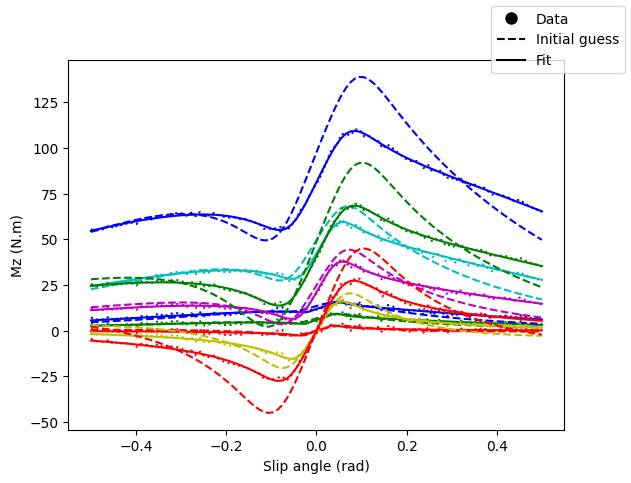

In [6]:
#Fitting Mz pure

Mz_pure_folder = r'samples\fit\Mz_pure'#Folder that contains the .csv files in the good format. For more details check the MFPy_/fit.py or read the readme.md
p_fit_MZ0,initial_guess,FZ_nom,FZ_data_output,MZ_data_output,alpha_data,gamma_data,MZ_initial_output,MZ_fit_output = mfpy.fit.MZ_pure(Mz_pure_folder,R0,VX,p_fit_FY0,
                                                                                                                        initial_guess=initial_guess_MZ_pure,FZ_nom=FZ0,full_output=2) 
colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)
fig, ax = plt.subplots()
for i in range(len(MZ_data_output)):
    color = colors[i % len(colors)]
    ax.plot(alpha_data[i],MZ_initial_output[i],'--',color=color)
    ax.plot(alpha_data[i],MZ_data_output[i],':',color=color)
    ax.plot(alpha_data[i],MZ_fit_output[i],'-',color=color)
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right') 
ax.set_xlabel('Slip angle (rad)')
ax.set_ylabel('Mz (N.m)') 
print(p_fit_MZ0)


#### Fx combined

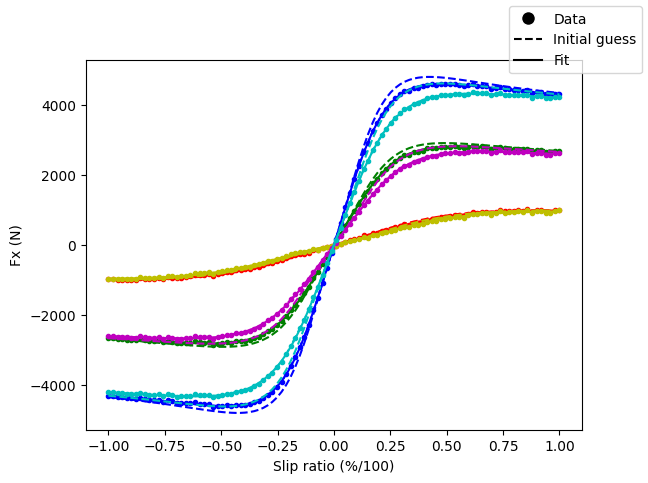

In [7]:
Fx_combined_folder = r'samples\fit\Fx_combined'#Folder that contains the .csv files in the good format. For more details check the MFPy_/fit.py or read the readme.md
p_fit_FX,initial_guess,FZ_nom,FZ_data_output,FX_data_output,kappa_data,alpha_data,FX_initial_output,FX_fit_output = mfpy.fit.FX_combined(Fx_combined_folder,p_fit_FX0,
                                                                                                                                         initial_guess = initial_guess_FX_combined,
                                                                                                                                         FZ_nom=FZ0,
                                                                                                                                         full_output=2) #The Mz_folder needs the p_fit_Fy_pure

#Plot settings
colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)
fig, ax = plt.subplots()
for i in range(len(FZ_data_output)):
    color = colors[i % len(colors)] 
    ax.plot(kappa_data[i],FX_initial_output[i],'--',color=color)
    ax.plot(kappa_data[i],FX_data_output[i],':',marker=".",color=color)
    ax.plot(kappa_data[i],FX_fit_output[i],'-',color=color)
ax.set_xlabel('Slip ratio (%/100)')
ax.set_ylabel('Fx (N)') 
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right')

#### Fy combined

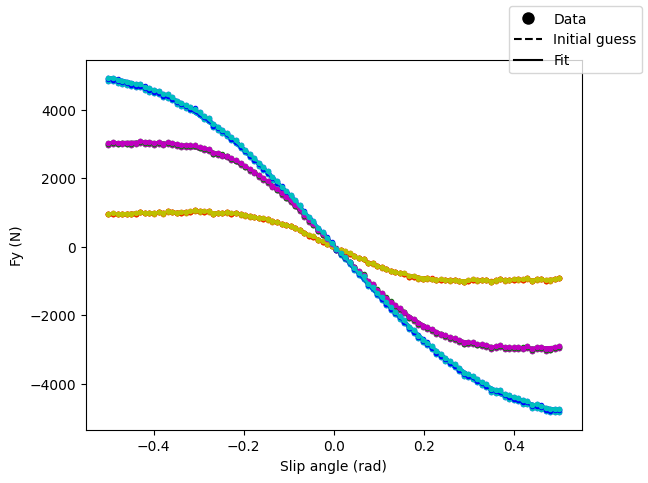

In [8]:
Fy_combined_folder = r'samples\fit\Fy_combined'#Folder that contains the .csv files in the good format. For more details check the MFPy_/fit.py or read the readme.md
p_fit_FY,initial_guess,Fz_nom,Fz_data_output,Fy_data_output,kappa_data,alpha_data,gamma_data,Fy_initial_output,Fy_fit_output = mfpy.fit.FY_combined(Fy_combined_folder,p_fit_FY0,
                                                                                                                                                    initial_guess = initial_guess_FY_combined,
                                                                                                                                                    FZ_nom=FZ0,
                                                                                                                                                    full_output=2) #The Mz_folder needs the p_fit_Fy_pure
colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)
fig, ax = plt.subplots()
for i in range(len(Fy_data_output)):
    color = colors[i % len(colors)]
    ax.plot(alpha_data[i],Fy_initial_output[i],'--',color=color)
    ax.plot(alpha_data[i],Fy_data_output[i],':',marker=".",color=color)
    ax.plot(alpha_data[i],Fy_fit_output[i],'-',color=color)
ax.set_xlabel('Slip angle (rad)')
ax.set_ylabel('Fy (N)') 
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right')   

#### Mz combined

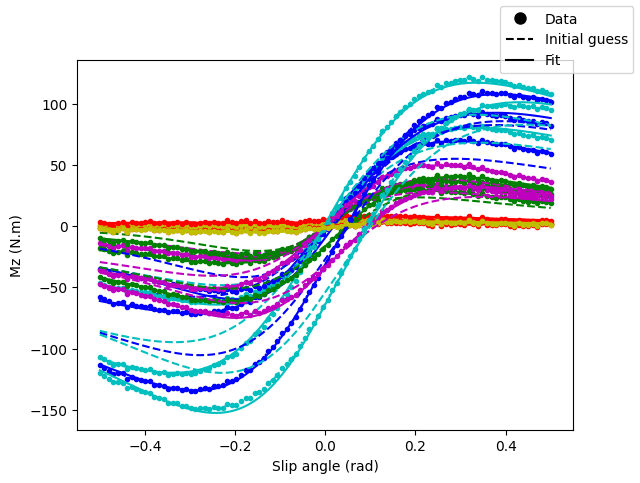

In [9]:
Mz_combined_folder = r'samples\fit\Mz_combined'#Folder that contains the .csv files in the good format. For more details check the MFPy_/fit.py or read the readme.md
p_fit_Mz,initial_guess,Fz_nom,Fz_data_output,Mz_data_output,alpha_data,gamma_data,Mz_initial_output,Mz_fit_output = mfpy.fit.MZ_combined(Mz_combined_folder,R0,VX,
                                                                                                                                         p_fit_FY0,p_fit_FX0,p_fit_MZ0,
                                                                                                                                         p_fit_FY,p_fit_FX,initial_guess = initial_guess_MZ_combined,
                                                                                                                                         FZ_nom=FZ0,full_output=2) #The Mz_folder needs the p_fit_Fy_pure
colors = ['r', 'g', 'b', 'y', 'm', 'c']
color_cycle = cycler(color=colors)
black_dot = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Data')
line_initial_legend = Line2D([0], [1], color='black',linestyle='--', label='Initial guess')
line_fit_legend = Line2D([0], [1], color='black', linestyle='-', label='Fit')
plt.rc('axes', prop_cycle=color_cycle)
fig, ax = plt.subplots()
for i in range(len(Mz_data_output)):
    color = colors[i % len(colors)]
    ax.plot(alpha_data[i],Mz_initial_output[i],'--',color=color)
    ax.plot(alpha_data[i],Mz_data_output[i],':',marker=".",color=color)
    ax.plot(alpha_data[i],Mz_fit_output[i],'-',color=color)
ax.set_xlabel('Slip angle (rad)')
ax.set_ylabel('Mz (N.m)') 
fig.legend(handles=[black_dot, line_initial_legend, line_fit_legend], loc='upper right') 